The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

**0.0: Installing needed libraries**

In [105]:
# Loading in required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**0.1: Importing Data and tiny winy investigation**

In [106]:
nobel_df = pd.read_csv('data/nobel.csv')
print(nobel_df.head(10))
print(nobel_df.info())
print(nobel_df.describe())

   year    category  ...      death_city   death_country
0  1901   Chemistry  ...          Berlin         Germany
1  1901  Literature  ...        Châtenay          France
2  1901    Medicine  ...         Marburg         Germany
3  1901       Peace  ...          Heiden     Switzerland
4  1901       Peace  ...           Paris          France
5  1901     Physics  ...          Munich         Germany
6  1902   Chemistry  ...          Berlin         Germany
7  1902  Literature  ...  Charlottenburg         Germany
8  1902    Medicine  ...    Putney Heath  United Kingdom
9  1902       Peace  ...            Bern     Switzerland

[10 rows x 18 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   

# 1.0: Answering -> What is the most commonly awarded gender and birth country?

## 1.1: for the gender

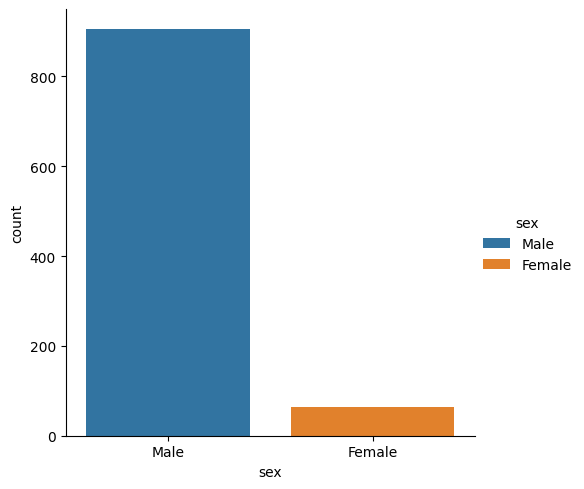

In [107]:
sns.catplot(x=nobel_df['sex'],kind='count',hue=nobel_df['sex'],)
plt.show()
top_gender = 'Male'

## 1.2: for the country

                                 count
birth_country            sex          
United States of America Male      274
United Kingdom           Male       91
Germany                  Male       65
France                   Male       52
Japan                    Male       28
Sweden                   Male       28
Canada                   Male       19
Switzerland              Male       19
Netherlands              Male       19
Russia                   Male       18
United States of America Female     17
Italy                    Male       16
Austria                  Male       15
Norway                   Male       12
Denmark                  Male       11
Scotland                 Male       10
China                    Male       10
Belgium                  Male        9
Australia                Male        9
India                    Male        8


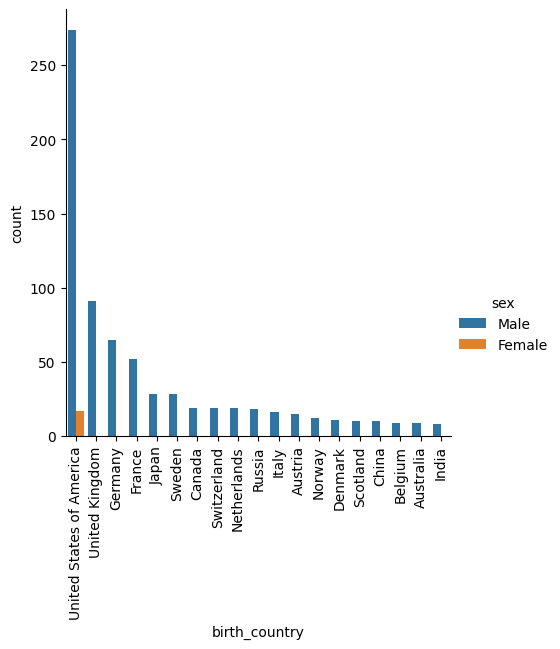

In [108]:
nobel_grouped=pd.DataFrame(nobel_df.groupby(['birth_country','sex'])['sex'].agg(count='count'))
nobel_grouped_croped = nobel_grouped.sort_values('count',ascending=False).head(20)
print(nobel_grouped_croped)
sns.catplot(x='birth_country',y='count',kind='bar',hue='sex',data=nobel_grouped_croped)
plt.xticks(rotation=90)
plt.show()
top_country = 'United States of America'

# 2.0: Answering -> What decade had the highest proportion of US-born winners?

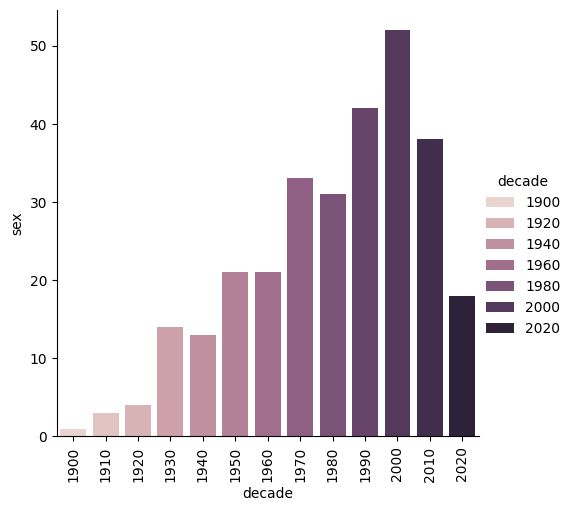

In [109]:
nobel_df_US =nobel_df[nobel_df['birth_country']=='United States of America'].reset_index()
nobel_df_US['decade'] = ((np.floor(nobel_df_US['year'] / 10))*10).astype(int)
nobel_df_US_grouped = pd.DataFrame(nobel_df_US.groupby('decade')['sex'].agg('count'))
nobel_df_US_grouped = nobel_df_US_grouped.sort_values('sex',ascending = False)
sns.catplot(x='decade',y='sex',data=nobel_df_US_grouped,kind='bar',hue='decade')
plt.xticks(rotation=90)
plt.show()
max_decade_usa= 2000

# 3.0: Answering -> What decade and category pair had the highest proportion of female laureates?

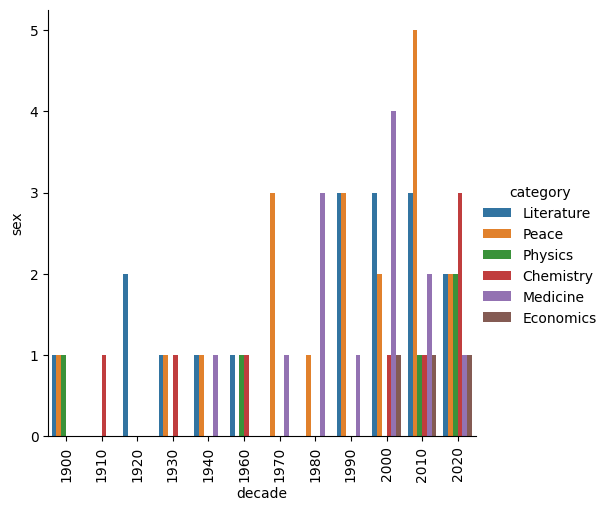

In [110]:
nobel_df_f = nobel_df[nobel_df['sex'] == 'Female']
nobel_df_f['decade'] = ((np.floor(nobel_df_f['year'] / 10))*10).astype(int)
nobel_df_f_grouped = pd.DataFrame(nobel_df_f.groupby(['decade','category'])['sex'].agg('count'))
sns.catplot(x='decade',y='sex',data=nobel_df_f_grouped,kind='bar',hue='category')
plt.xticks(rotation=90)
plt.show()
max_female_dict = {'decade':'Peace'}

# 4.0: Answering -> Who was the first woman to receive a Nobel Prize, and in what category?

In [111]:
nobel_df_f['year'].sort_values()
firstwomen = nobel_df_f[nobel_df_f['year']==1903]
firstwomen

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900


In [112]:
first_woman_name = 'Marie Curie, née Sklodowska'
first_woman_category = 'Physics'
print(first_woman_name,first_woman_category)

Marie Curie, née Sklodowska Physics


# 5.0: Answering -> Which individuals or organizations have won multiple Nobel Prizes throughout the years? 

In [113]:
nobel_df_dup = nobel_df[nobel_df['full_name'].duplicated() == True]
repeat_list = nobel_df_dup['full_name'].tolist()
repeat_list

['Marie Curie, née Sklodowska',
 'Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'John Bardeen',
 'Frederick Sanger',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']

# _DC solution_


 The gender with the most Nobel laureates is : Male
 The most common birth country of Nobel laureates is : United States of America

 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.

 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


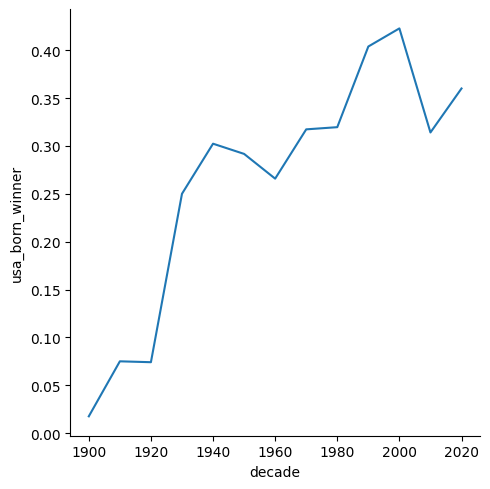

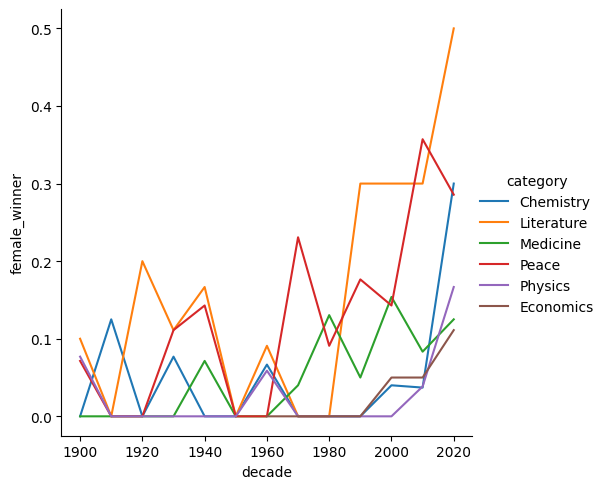

In [114]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Read in the Nobel Prize data
nobel = pd.read_csv('data/nobel.csv')

# Store and display the most commonly awarded gender and birth country in requested variables
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]

print("\n The gender with the most Nobel laureates is :", top_gender)
print(" The most common birth country of Nobel laureates is :", top_country)

# Calculate the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Identify the decade with the highest proportion of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]

# Optional: Plotting USA born winners
ax1 = sns.relplot(x='decade', y='usa_born_winner', data=prop_usa_winners, kind="line")

# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

# Optional: Plotting female winners with % winners on the y-axis
ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line")

# Finding the first woman to win a Nobel Prize
nobel_women = nobel[nobel['female_winner']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")

# Selecting the laureates that have received 2 or more prizes
counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

print("\n The repeat winners are :", repeat_list)